## Import Libraries

In [90]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

## The Data

In [91]:
train = pd.read_csv('IBM.csv')

In [92]:
train.head()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,41,Yes,Sales,1,2,Life Sciences,2,4,Single,5993,8,1,6
1,49,No,Research & Development,8,1,Life Sciences,3,2,Married,5130,1,3,10
2,37,Yes,Research & Development,2,2,Other,4,3,Single,2090,6,3,0
3,33,No,Research & Development,3,4,Life Sciences,4,3,Married,2909,1,3,8
4,27,No,Research & Development,2,1,Medical,1,2,Married,3468,9,3,2


# Missing Data

In [93]:
train.isnull()

,Age,Attrition,Department,DistanceFromHome,Education,EducationField,EnvironmentSatisfaction,JobSatisfaction,MaritalStatus,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
0,False,False,False,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
1465,False,False,False,False,False,False,False,False,False,False,False,False,False
1466,False,False,False,False,False,False,False,False,False,False,False,False,False
1467,False,False,False,False,False,False,False,False,False,False,False,False,False
1468,False,False,False,False,False,False,False,False,False,False,False,False,False


In [94]:
train.shape

(1470, 13)

<AxesSubplot:>

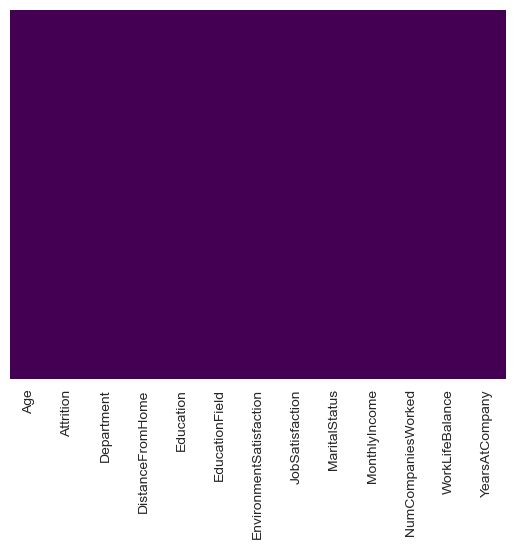

In [95]:
sns.heatmap(train.isnull(),yticklabels=False,cbar=False,cmap='viridis')

By observation, we can now confirm that there are no null values or missing values present in the data.

# Exploratory Data Analysis

In [96]:
train.describe()

,Age,DistanceFromHome,Education,EnvironmentSatisfaction,JobSatisfaction,MonthlyIncome,NumCompaniesWorked,WorkLifeBalance,YearsAtCompany
count,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000,1470.000000
mean,36.923810,9.192517,2.912925,2.721769,2.728571,6502.931293,2.693197,2.761224,7.008163
std,9.135373,8.106864,1.024165,1.093082,1.102846,4707.956783,2.498009,0.706476,6.126525
min,18.000000,1.000000,1.000000,1.000000,1.000000,1009.000000,0.000000,1.000000,0.000000
25%,30.000000,2.000000,2.000000,2.000000,2.000000,2911.000000,1.000000,2.000000,3.000000
50%,36.000000,7.000000,3.000000,3.000000,3.000000,4919.000000,2.000000,3.000000,5.000000
75%,43.000000,14.000000,4.000000,4.000000,4.000000,8379.000000,4.000000,3.000000,9.000000
max,60.000000,29.000000,5.000000,4.000000,4.000000,19999.000000,9.000000,4.000000,40.000000


In [97]:
train.dtypes

Age                         int64
Attrition                  object
Department                 object
DistanceFromHome            int64
Education                   int64
EducationField             object
EnvironmentSatisfaction     int64
JobSatisfaction             int64
MaritalStatus              object
MonthlyIncome               int64
NumCompaniesWorked          int64
WorkLifeBalance             int64
YearsAtCompany              int64
dtype: object

In [98]:
train.shape

#we have 13 observations for 1470 columns

(1470, 13)

array([[<AxesSubplot:title={'center':'Age'}>,
        <AxesSubplot:title={'center':'DistanceFromHome'}>,
        <AxesSubplot:title={'center':'Education'}>],
       [<AxesSubplot:title={'center':'EnvironmentSatisfaction'}>,
        <AxesSubplot:title={'center':'JobSatisfaction'}>,
        <AxesSubplot:title={'center':'MonthlyIncome'}>],
       [<AxesSubplot:title={'center':'NumCompaniesWorked'}>,
        <AxesSubplot:title={'center':'WorkLifeBalance'}>,
        <AxesSubplot:title={'center':'YearsAtCompany'}>]], dtype=object)

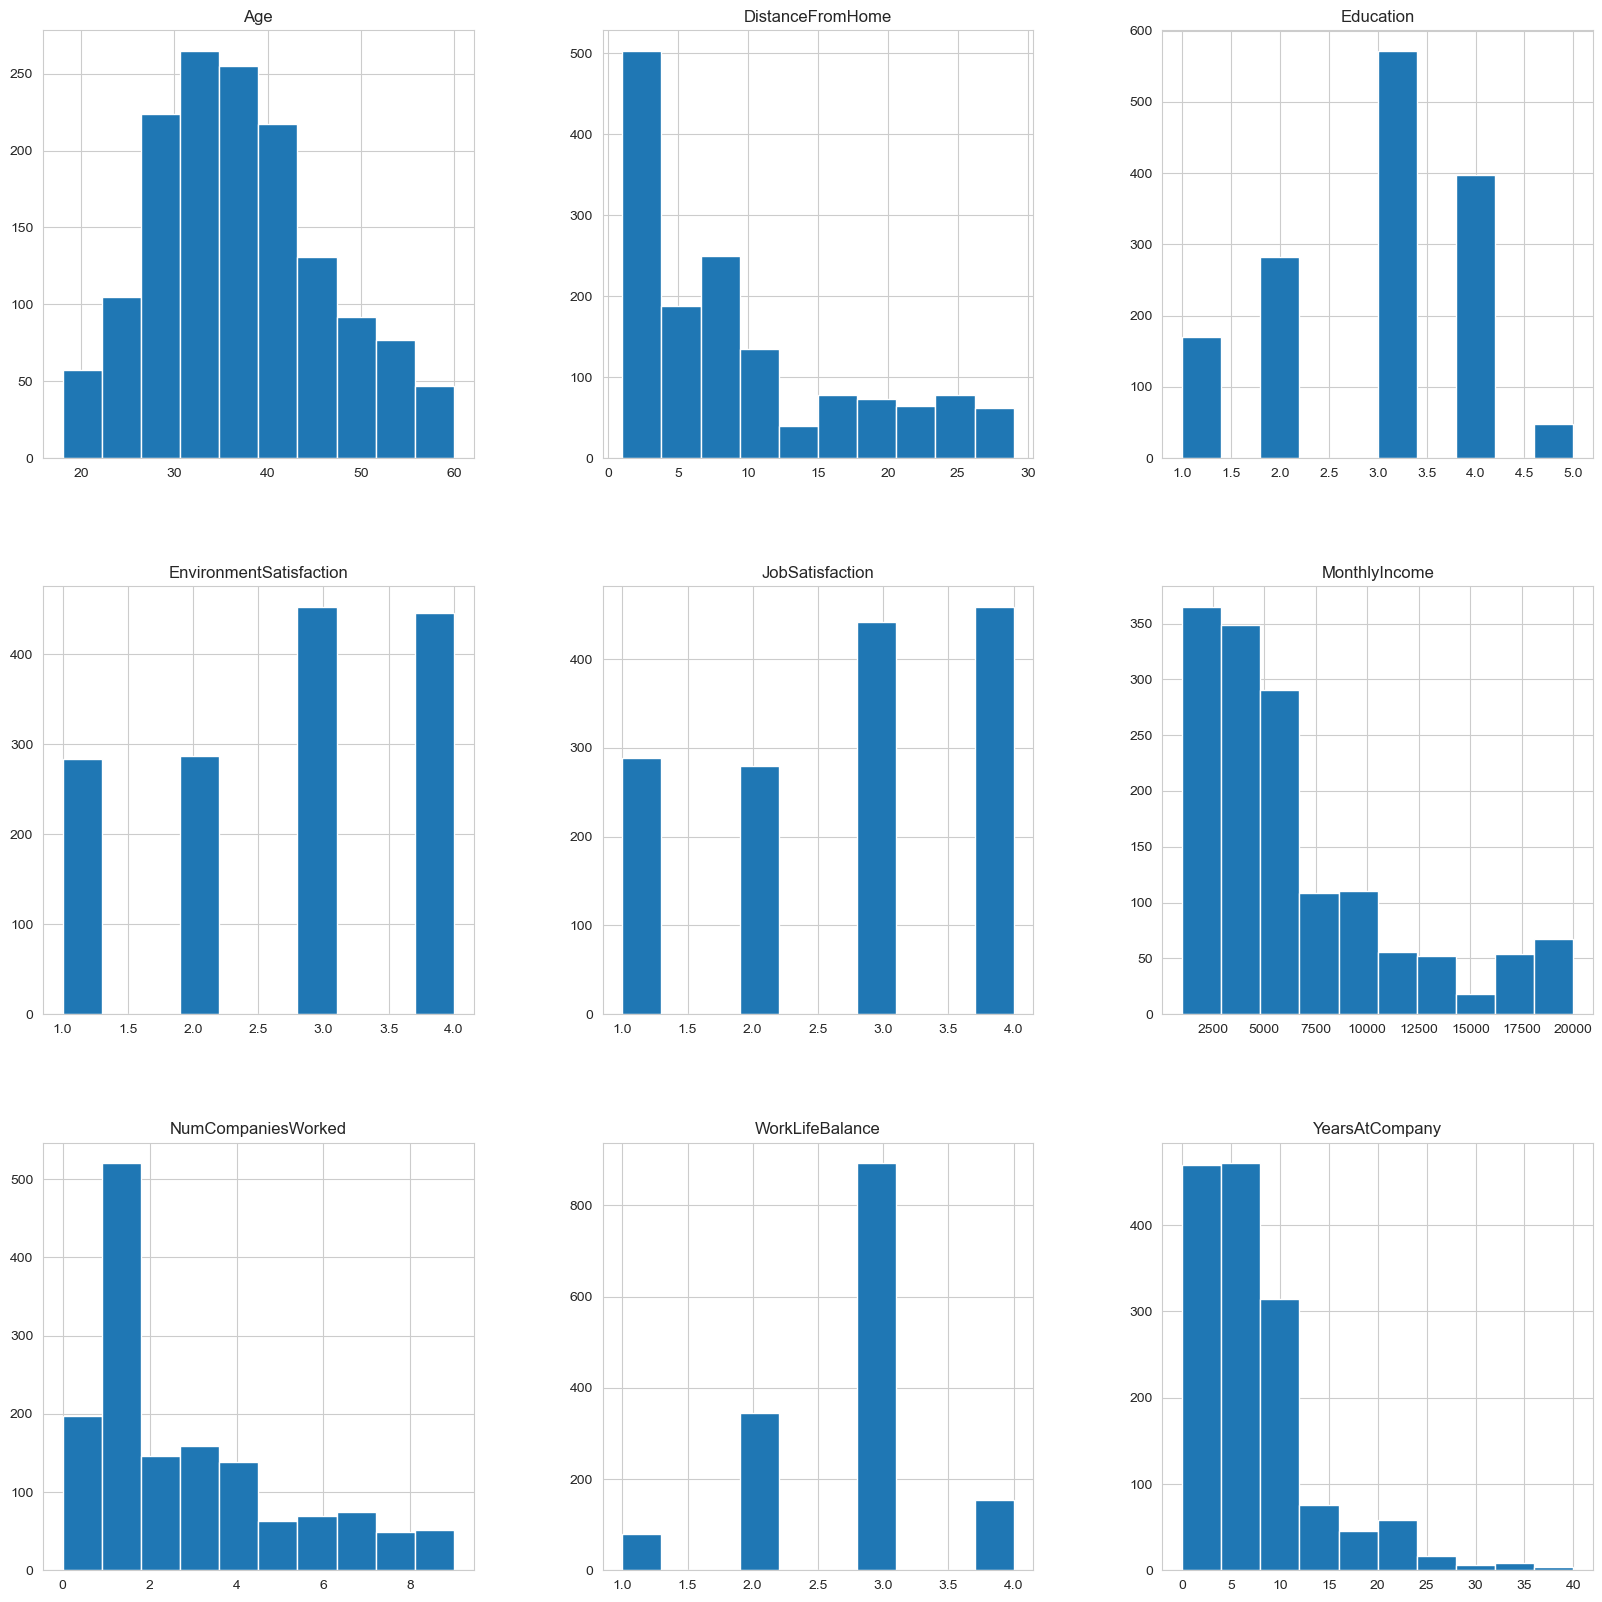

In [99]:
train.hist(figsize=(20, 20))

In [100]:
cat_val = []
for c in train.columns:
    if train[c].dtype == object:
        cat_val.append(c)
        print(c, '->',train[c].unique())

Attrition -> ['Yes' 'No']
Department -> ['Sales' 'Research & Development' 'Human Resources']
EducationField -> ['Life Sciences' 'Other' 'Medical' 'Marketing' 'Technical Degree'
 'Human Resources']
MaritalStatus -> ['Single' 'Married' 'Divorced']


# Attrition

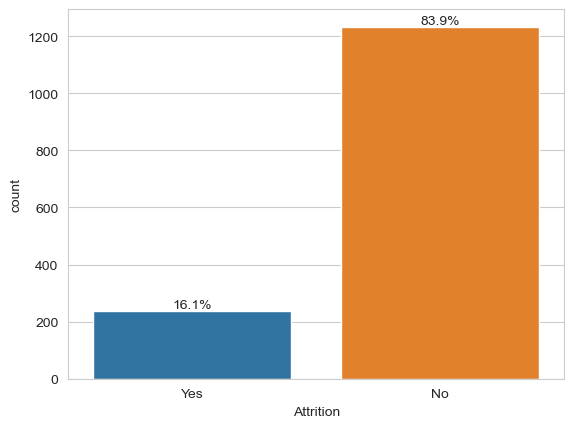

In [101]:
sns.set_style('whitegrid')
ax = sns.countplot(x='Attrition', data=train)

total = len(train['Attrition'])
for p in ax.patches:
    percentage = '{:.1f}%'.format(100 * p.get_height() / total)
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.annotate(percentage, (x, y), ha='center', va='bottom')

plt.show()

<font color=red><h1>Analysis by Age</h1></font>
Every generation have their differences and these should be explored in this dataset.
let's designate the generation as follows:
- Generation A:- <30
- Generation B:- 30-39
- Generation C:- 40-49
- Generation D:- 50-59
- Generation E:- >=60

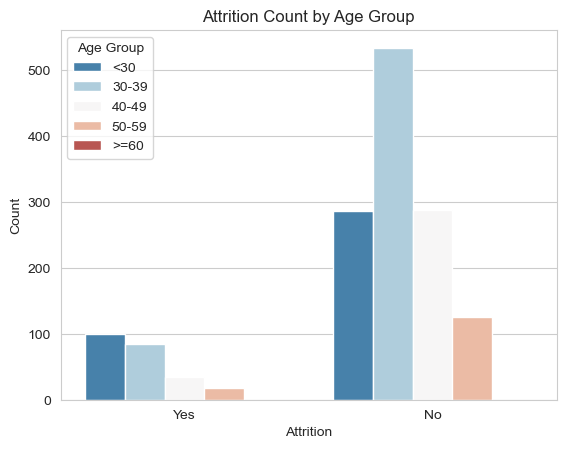

In [106]:
# Define age groups
age_groups = ['<30', '30-39', '40-49', '50-59', '>=60']

# Categorize age into groups
train['AgeGroup'] = pd.cut(train['Age'], bins=[0, 30, 40, 50, 60, float('inf')], labels=age_groups)

# Create count plot with age groups
sns.set_style('whitegrid')
sns.countplot(x='Attrition', hue='AgeGroup', data=train, palette='RdBu_r')

plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Count by Age Group')
plt.legend(title='Age Group')
plt.show()


Attrition Count by Age Group - More people below 30 goes for attrition

<font color=red><h1>Analysis by EnvironmentSatisfaction</h1></font>

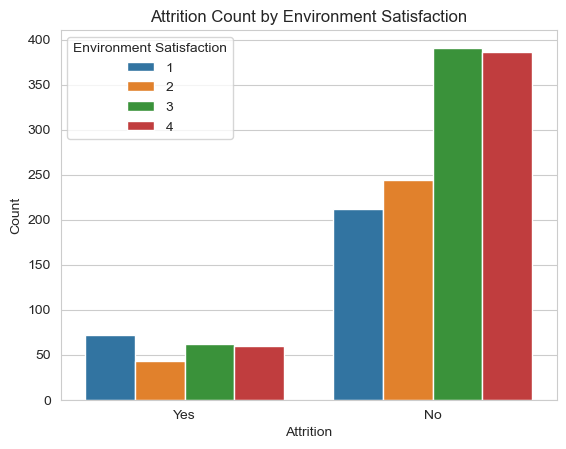

In [107]:

sns.set_style('whitegrid')
sns.countplot(x='Attrition', hue='EnvironmentSatisfaction', data=train)

plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Count by Environment Satisfaction')
plt.legend(title='Environment Satisfaction')
plt.show()

### Box Plot:

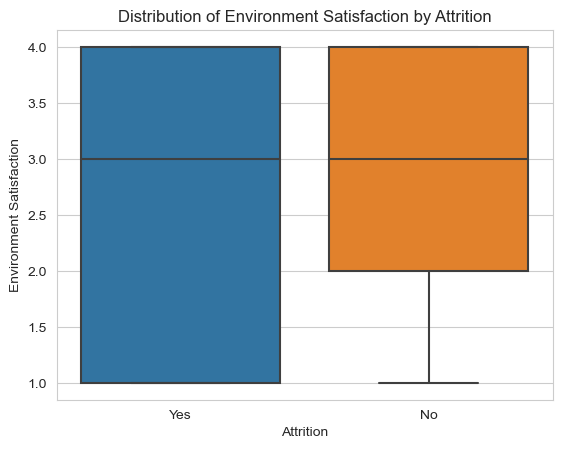

In [108]:
sns.set_style('whitegrid')
sns.boxplot(x='Attrition', y='EnvironmentSatisfaction', data=train)

plt.xlabel('Attrition')
plt.ylabel('Environment Satisfaction')
plt.title('Distribution of Environment Satisfaction by Attrition')
plt.show()

### Violin Plot:

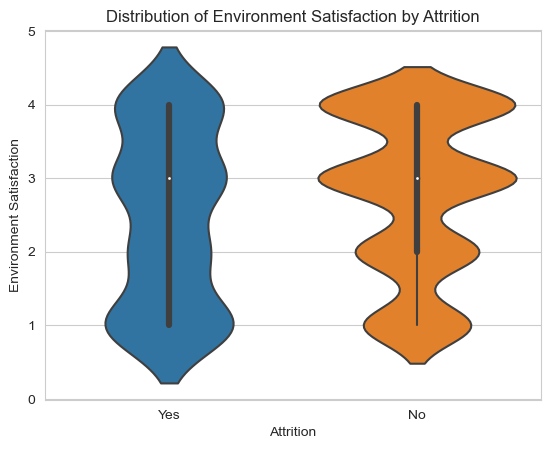

In [109]:
sns.set_style('whitegrid')
sns.violinplot(x='Attrition', y='EnvironmentSatisfaction', data=train)

plt.xlabel('Attrition')
plt.ylabel('Environment Satisfaction')
plt.title('Distribution of Environment Satisfaction by Attrition')
plt.show()

Text(0.5, 1.0, 'Employee Job Satisfaction Rating - Attrition vs No Attrition')

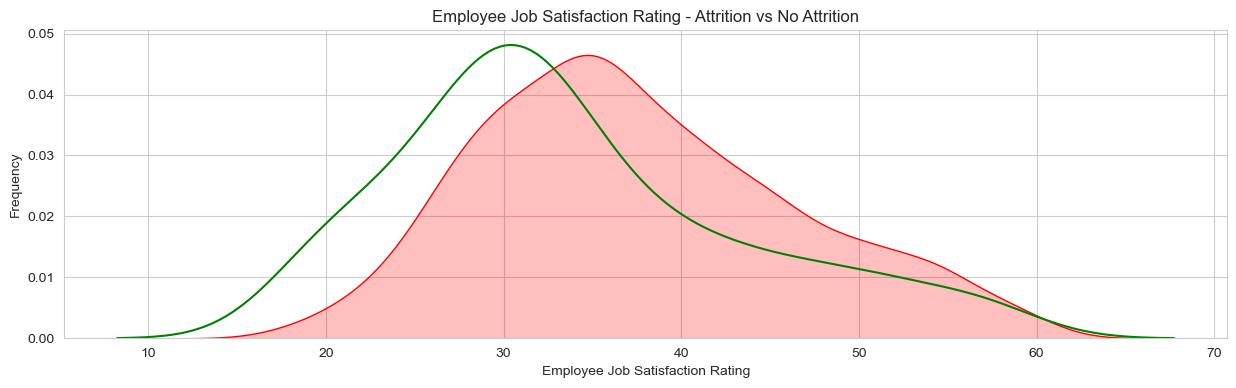

In [123]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(train.loc[(train['Attrition']=='Yes'),'Age'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(train.loc[(train['Attrition']=='No'),'Age'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee Job Satisfaction Rating',ylabel='Frequency')
plt.title('Employee Job Satisfaction Rating - Attrition vs No Attrition')

<font color=red><h1>Analysis by JobSatisfaction</h1></font>

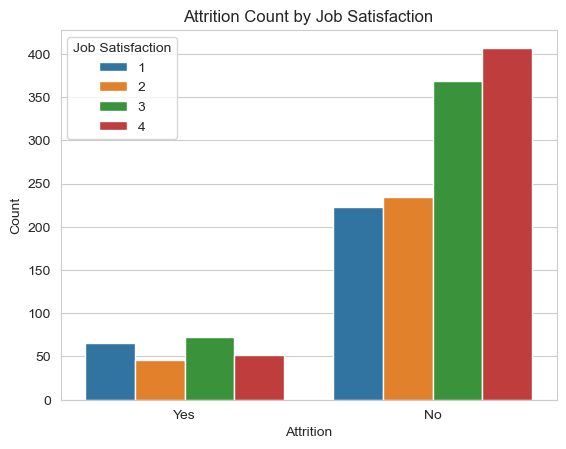

In [115]:
sns.set_style('whitegrid')
sns.countplot(x='Attrition', hue='JobSatisfaction', data=train)

plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Count by Job Satisfaction')
plt.legend(title='Job Satisfaction')
plt.show()

## Bar Graph

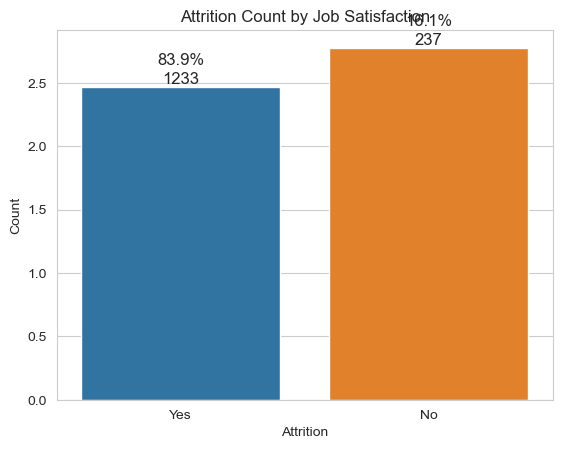

In [119]:
count_data = train['Attrition'].value_counts()
total_count = count_data.sum()
percentages = [(count / total_count) * 100 for count in count_data]

sns.set_style('whitegrid')
ax = sns.barplot(x='Attrition', y='JobSatisfaction', data=train, ci=None)

# Add count labels
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    ax.text(x, y, f'{count_data[i]}', ha='center', va='bottom', fontsize=12)

# Add percentage labels with adjusted positions
for i, p in enumerate(ax.patches):
    x = p.get_x() + p.get_width() / 2
    y = p.get_height()
    spacing = 0.15
    if i < len(percentages):  # Check if index is within range
        ax.text(x, y + spacing, f'{percentages[i]:.1f}%', ha='center', va='bottom', fontsize=12)

plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Count by Job Satisfaction')
plt.show()

Text(0.5, 1.0, 'Employee Job Satisfaction Rating - Attrition vs No Attrition')

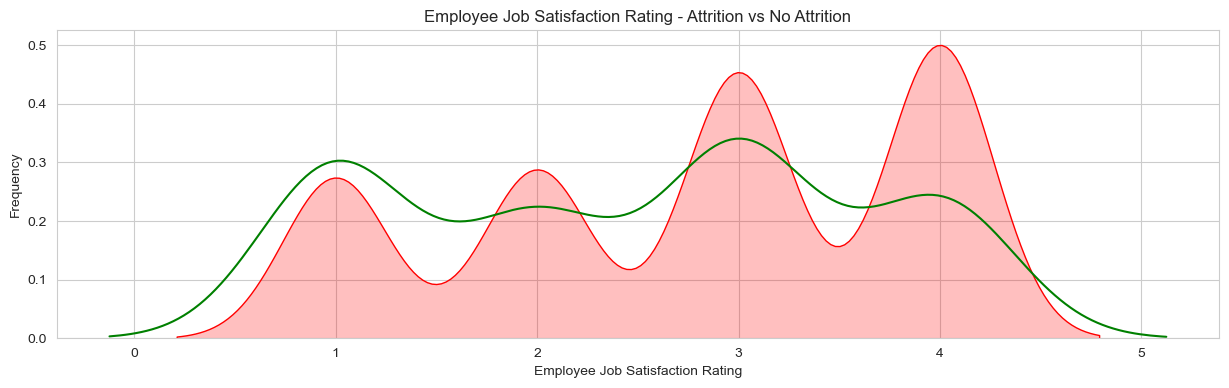

In [122]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(train.loc[(train['Attrition']=='Yes'),'JobSatisfaction'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(train.loc[(train['Attrition']=='No'),'JobSatisfaction'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee Job Satisfaction Rating',ylabel='Frequency')
plt.title('Employee Job Satisfaction Rating - Attrition vs No Attrition')

<font color=red><h1>Analysis by Monthly Income</h1></font>

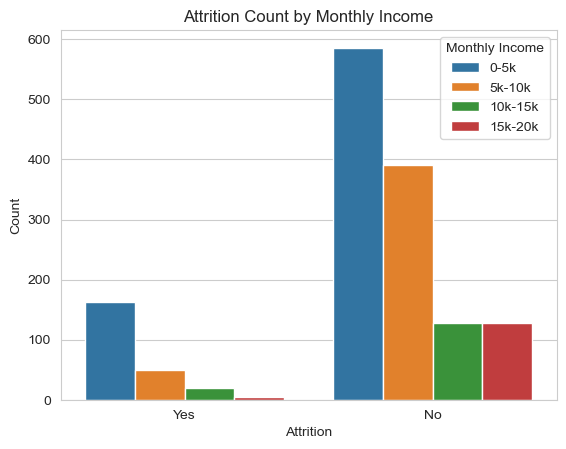

In [129]:
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt

# Create income bins
income_bins = [0, 5000, 10000, 15000, 20000]
income_labels = ['0-5k', '5k-10k', '10k-15k', '15k-20k']

# Convert MonthlyIncome to categorical bins
train['IncomeRange'] = pd.cut(train['MonthlyIncome'], bins=income_bins, labels=income_labels)

# Plot count of attrition by income range
sns.set_style('whitegrid')
ax = sns.countplot(x='Attrition', hue='IncomeRange', data=train)

plt.xlabel('Attrition')
plt.ylabel('Count')
plt.title('Attrition Count by Monthly Income')
plt.legend(title='Monthly Income')
plt.show()

Text(0.5, 1.0, 'Employee MonthlyIncome Rating - Attrition vs No Attrition')

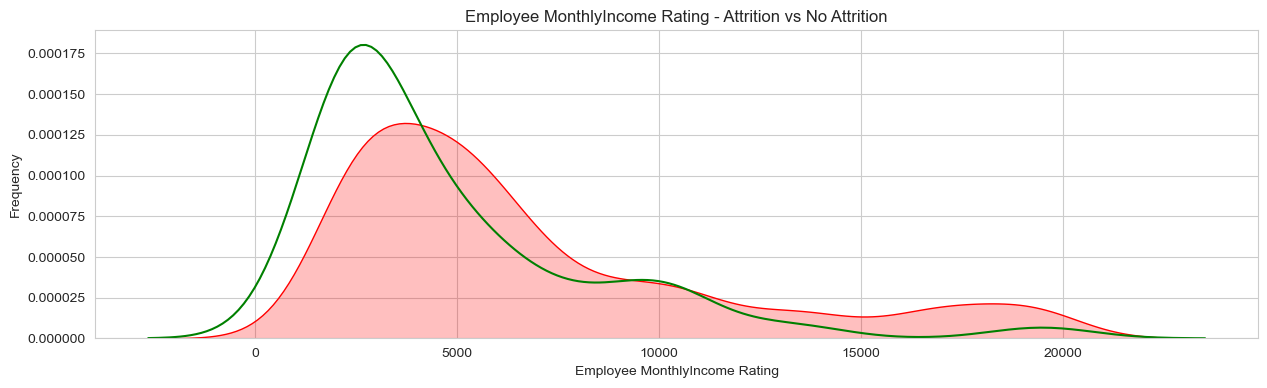

In [130]:
fig=plt.figure(figsize=(15,4))
ax=sns.kdeplot(train.loc[(train['Attrition']=='Yes'),'MonthlyIncome'],color='g',shade=False,label='No Attrition')
ax=sns.kdeplot(train.loc[(train['Attrition']=='No'),'MonthlyIncome'],color='r',shade=True,label='Attrition')
ax.set(xlabel='Employee MonthlyIncome Rating',ylabel='Frequency')
plt.title('Employee MonthlyIncome Rating - Attrition vs No Attrition')

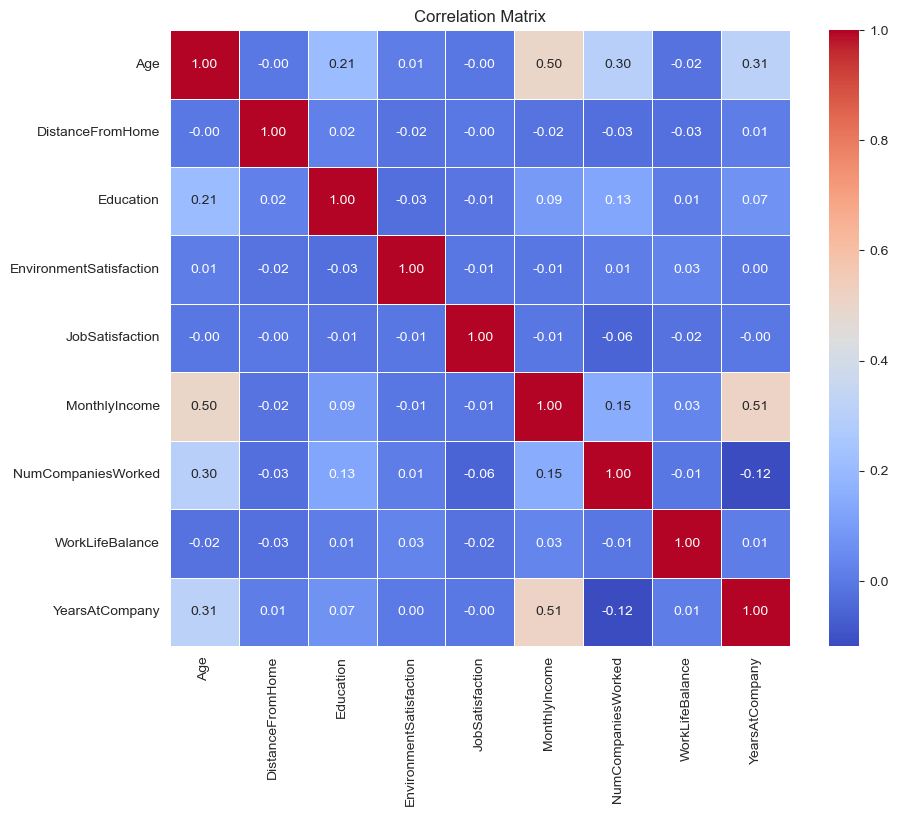

In [131]:

correlation_matrix = train.corr()

# Plotting the correlation matrix using a heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Correlation Matrix')
plt.show()